In [1]:
# Add relevant Jupyter notebook extensions 

In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))


In [2]:
from uuv_mission.dynamic import Mission

mission = Mission.from_csv("../mission.csv")
print(type(mission))
print(len(mission.reference))



<class 'uuv_mission.dynamic.Mission'>
100


In [3]:
from uuv_mission.dynamic import Mission
from uuv_mission.terrain import Submarine
from uuv_mission.dynamic import ClosedLoop


In [4]:
from uuv_mission.dynamic import Mission
from uuv_mission.dynamic import ClosedLoop, Submarine
from control import PDController
import numpy as np

print("✅ Imports successful")


✅ Imports successful


In [5]:
mission = Mission.from_csv("../mission.csv")
controller = PDController(kp=0.03, kd=0.75)

submarine = Submarine()
system = ClosedLoop(submarine, controller)

print("✅ System ready for simulation")


✅ System ready for simulation


In [6]:
from uuv_mission.dynamic import Mission

mission = Mission.from_csv("../mission.csv")
print(type(mission))
print(len(mission.reference))


<class 'uuv_mission.dynamic.Mission'>
100


In [17]:
disturbances = np.zeros(10)

result = system.simulate(
    Mission(
        reference=mission.reference[:10],
        cave_height=mission.cave_height[:10],
        cave_depth=mission.cave_depth[:10]
    ),
    disturbances
)

print("✅ Simulation finished.")
print("Depths:", result["positions"])
print("Actions:", result["actions"])


Step 0, depth = 0.00
✅ Simulation finished.
Depths: [ 0.          0.          2.28065222  6.44147723 10.11188445 11.23428115
  9.66921267  6.92914668  4.6730934   3.48296007]
Actions: [ 0.          2.28065222  2.10823802 -0.0743353  -2.18096979 -2.57522552
 -1.33150436  0.21000612  0.84031462  0.44465234]


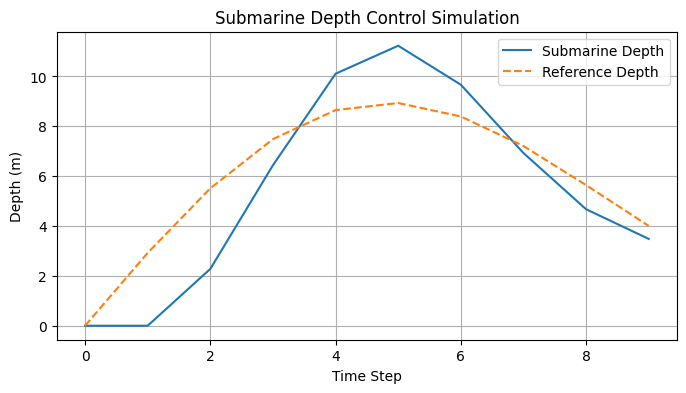

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(result["positions"], label="Submarine Depth")
plt.plot(mission.reference[:len(result["positions"])], "--", label="Reference Depth")
plt.xlabel("Time Step")
plt.ylabel("Depth (m)")
plt.title("Submarine Depth Control Simulation")
plt.legend()
plt.grid(True)
plt.show()


Step 0, depth = 0.00
Step 10, depth = 3.48
Step 20, depth = 10.65
Step 30, depth = 3.04
Step 40, depth = 14.79
Step 50, depth = 12.98
Step 60, depth = 1.70
Step 70, depth = 13.27
Step 80, depth = 3.20
Step 90, depth = -6.42


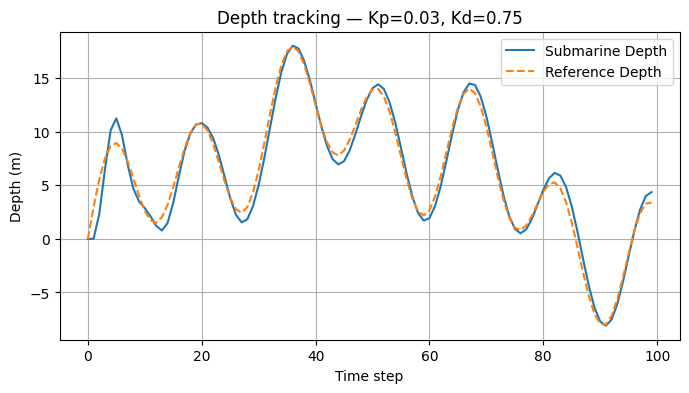

In [19]:
# run full sim and save figure
controller = PDController(kp=0.03, kd=0.75)
submarine = Submarine()
system = ClosedLoop(submarine, controller)

Nfull = 100
res_full = system.simulate(
    Mission(reference=mission.reference[:Nfull],
            cave_height=mission.cave_height[:Nfull],
            cave_depth=mission.cave_depth[:Nfull]),
    np.zeros(Nfull)
)

# plot and save
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(res_full["positions"], label="Submarine Depth")
plt.plot(mission.reference[:Nfull], "--", label="Reference Depth")
plt.xlabel("Time step")
plt.ylabel("Depth (m)")
plt.title(f"Depth tracking — Kp={controller.kp}, Kd={controller.kd}")
plt.legend()
plt.grid(True)
plt.savefig("depth_plot.png", dpi=200, bbox_inches="tight")
plt.show()


In [1]:
import sys
print(sys.executable)


c:\Users\hatti\Desktop\b1-coding-practical-mt24\.venv\Scripts\python.exe


In [15]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\python310.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\lib', 'C:\\Users\\hatti\\AppData\\Local\\Microsoft\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0', 'c:\\Users\\hatti\\Desktop\\b1-coding-practical-mt24\\.venv', '', 'c:\\Users\\hatti\\Desktop\\b1-coding-practical-mt24\\.venv\\lib\\site-packages', 'c:\\Users\\hatti\\Desktop\\b1-coding-practical-mt24', 'c:\\Users\\hatti\\Desktop\\b1-coding-practical-mt24', 'c:\\Users\\hatti\\Desktop\\b1-coding-practical-mt24']


# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

Step 0, depth = 0.00
Step 10, depth = 3.39
Step 20, depth = 11.07
Step 30, depth = 3.42
Step 40, depth = 15.41
Step 50, depth = 13.76
Step 60, depth = 2.74
Step 70, depth = 14.15
Step 80, depth = 4.51
Step 90, depth = -5.84


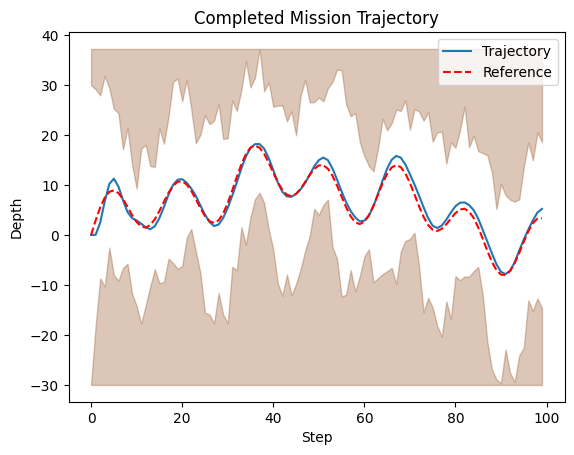

In [7]:
sub = Submarine()
closed_loop = ClosedLoop(sub, controller)
mission = Mission.from_csv("../mission.csv")

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)


In [12]:
from uuv_mission.dynamic import Mission, ClosedLoop
from control import PDController
from uuv_mission.dynamic import Submarine
import numpy as np

mission = Mission.from_csv("../mission.csv")
controller = PDController()
submarine = Submarine()

system = ClosedLoop(submarine, controller)

# simulate with zero disturbances
disturbances = np.zeros(len(mission.reference))
result = system.simulate(mission, disturbances)

print("Simulation finished.")
print("First few depths:", result["positions"][:5])
print("First few actions:", result["actions"][:5])



Step 0, depth = 0.00
Step 10, depth = 2.42
Step 20, depth = 12.72
Step 30, depth = 2.15
Step 40, depth = 15.88
Step 50, depth = 13.95
Step 60, depth = -0.14
Step 70, depth = 14.53
Step 80, depth = 2.65
Step 90, depth = -8.69
Simulation finished.
First few depths: [ 0.          0.          2.19293482  6.54797142 11.12989774]
First few actions: [ 0.          2.19293482  2.38139526  0.66239338 -1.59874744]


In [13]:
result = system.simulate(
    Mission(reference=mission.reference[:100],  # first 100 steps only
             cave_height=mission.cave_height[:100],
             cave_depth=mission.cave_depth[:100]),
    np.zeros(100)
)

Step 0, depth = 5.71
Step 10, depth = 1.53
Step 20, depth = 12.64
Step 30, depth = 2.26
Step 40, depth = 15.83
Step 50, depth = 13.96
Step 60, depth = -0.14
Step 70, depth = 14.53
Step 80, depth = 2.65
Step 90, depth = -8.69


In [14]:
result = system.simulate(
    Mission(reference=mission.reference[:20],
            cave_height=mission.cave_height[:100],
            cave_depth=mission.cave_depth[:100]),
    np.zeros(100)
)


Step 0, depth = 5.71
Step 10, depth = 1.53
